In [1]:
library(dplyr)
library(Seurat)
library(ggplot2)
library(future)
library(Cairo)
library(DoubletFinder)
library(Matrix)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject



In [2]:
mt_genes_part = "AAEL018658|AAEL018659|AAEL018660|AAEL018661|AAEL018662|AAEL018663|AAEL018664|AAEL018665|AAEL018666|AAEL018667|AAEL018668|AAEL018669|AAEL018670|AAEL018671|AAEL018672|AAEL018673|AAEL018674|AAEL018675|AAEL018676|AAEL018677|AAEL018678|AAEL018679|AAEL018680|AAEL018681|AAEL018682|AAEL018683|AAEL018684|AAEL018685|AAEL018686|AAEL018687|AAEL018688|AAEL018689|AAEL018690|AAEL018691|AAEL018692|AAEL018693|AAEL018694|AAEL020667"

In [3]:
mt_genes = c("AAEL018658", "AAEL018659", "AAEL018660", "AAEL018661", "AAEL018662", "AAEL018663", "AAEL018664", "AAEL018665", "AAEL018666", "AAEL018667", "AAEL018668", "AAEL018669", "AAEL018670", "AAEL018671", "AAEL018672", "AAEL018673", "AAEL018674", "AAEL018675", "AAEL018676", "AAEL018677", "AAEL018678", "AAEL018679", "AAEL018680", "AAEL018681", "AAEL018682", "AAEL018683", "AAEL018684", "AAEL018685", "AAEL018686", "AAEL018687", "AAEL018688", "AAEL018689", "AAEL018690", "AAEL018691", "AAEL018692", "AAEL018693", "AAEL018694", "AAEL020667")

In [4]:
rib_genes = c("AAEL018689", "AAEL018691", "AAEL019020", "AAEL019044", "AAEL019045", "AAEL019110", "AAEL019116", "AAEL019124", "AAEL019130", "AAEL019152", "AAEL019153", "AAEL019154", "AAEL019156", "AAEL019157", "AAEL019158", "AAEL019159", "AAEL019160", "AAEL019161", "AAEL019162", "AAEL019163", "AAEL019167", "AAEL019180", "AAEL019187", "AAEL019188", "AAEL019233", "AAEL019278", "AAEL019313", "AAEL019325", "AAEL019332", "AAEL019333", "AAEL019334", "AAEL019338", "AAEL019366", "AAEL019391", "AAEL028637", "AAEL028638", "AAEL028644", "AAEL028649", "AAEL028650", "AAEL028653", "AAEL028655", "AAEL028657", "AAEL028658", "AAEL028659", "AAEL028663", "AAEL028665", "AAEL028668", "AAEL028669", "AAEL028677", "AAEL028682", "AAEL028683", "AAEL028685", "AAEL028688", "AAEL028689", "AAEL028695", "AAEL028697", "AAEL028699", "AAEL028707", "AAEL028724", "AAEL028726", "AAEL028728", "AAEL028730", "AAEL028731", "AAEL028736", "AAEL028738", "AAEL028739", "AAEL028740", "AAEL028742", "AAEL028756", "AAEL028757", "AAEL028762", "AAEL028764", "AAEL028766", "AAEL028767", "AAEL028769", "AAEL028771", "AAEL028776", "AAEL028777", "AAEL028782", "AAEL028786", "AAEL028790", "AAEL028794", "AAEL028798", "AAEL028802", "AAEL028803", "AAEL028808", "AAEL028813", "AAEL028821", "AAEL028849", "AAEL028852", "AAEL028853", "AAEL028856", "AAEL028857", "AAEL028858", "AAEL028860", "AAEL028862", "AAEL028865", "AAEL028867", "AAEL028872", "AAEL028878", "AAEL028884", "AAEL028895", "AAEL028901", "AAEL028906", "AAEL028907", "AAEL028908", "AAEL028912", "AAEL028917", "AAEL028921", "AAEL028925", "AAEL028929", "AAEL028938", "AAEL028952", "AAEL028967", "AAEL028969", "AAEL028975", "AAEL028977", "AAEL028980", "AAEL028981", "AAEL028985", "AAEL028994", "AAEL028996", "AAEL028997")

# before QC

Saving 6.67 x 6.67 in image


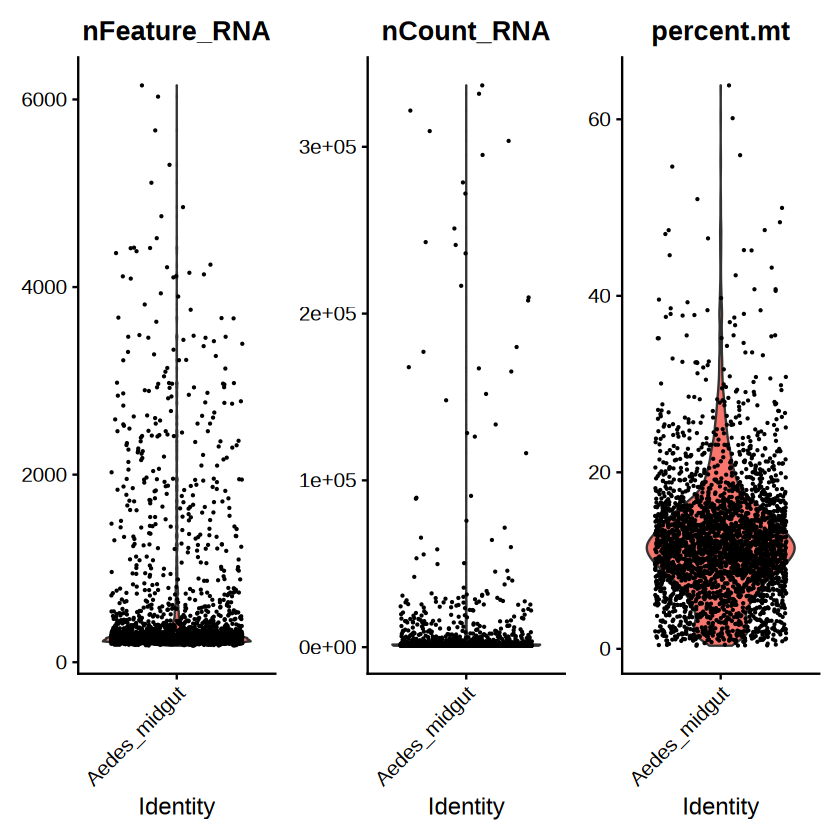

In [5]:
# before QC, "nFeature_RNA", "nCount_RNA", "percent.mt" should be plot to choose a reliable threshold

# path to 10x directory
ipath = '/public21/home/sc90258/huangying/analysis/1.Aedes_scRNA-Seq/20231103_Aedes_midgut.2sp_rerun/1.cellranger_count/map_20231008_Aaedes_midgut_reanalysis/outs/filtered_feature_bc_matrix'
# 'project' in 'CreateSeuratObject'
project = 'Aedes_midgut'
# args[3]: path to save seurat_obj (R virable)
opath_seurat_obj = '1.before_QC.seurat_obj.rds'
# args[4]: path to save violin plot (pdf)
opath_vlnplot = '1.before_QC.vlnplot.pdf'


library(Seurat)
library(ggplot2)
# read in data
data10x = Read10X(
    data.dir = ipath
)

# make Seurat object of RNA data
# create Seurat object
seurat_obj =  CreateSeuratObject(
    counts = data10x, 
    assay = "RNA",
    project = project, 
    min.cells = 3
)
# The [[ operator can add columns to object metadata. This is a great place to stash QC stats
seurat_obj[["percent.mt"]] <- PercentageFeatureSet(
    seurat_obj,
    pattern = mt_genes_part,
    )
# save data
saveRDS(seurat_obj, file = opath_seurat_obj)

# Visualize QC metrics as a violin plot
p = VlnPlot(seurat_obj, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
ggsave(opath_vlnplot)
p

# QC

## cutoff 5%

Saving 6.67 x 6.67 in image


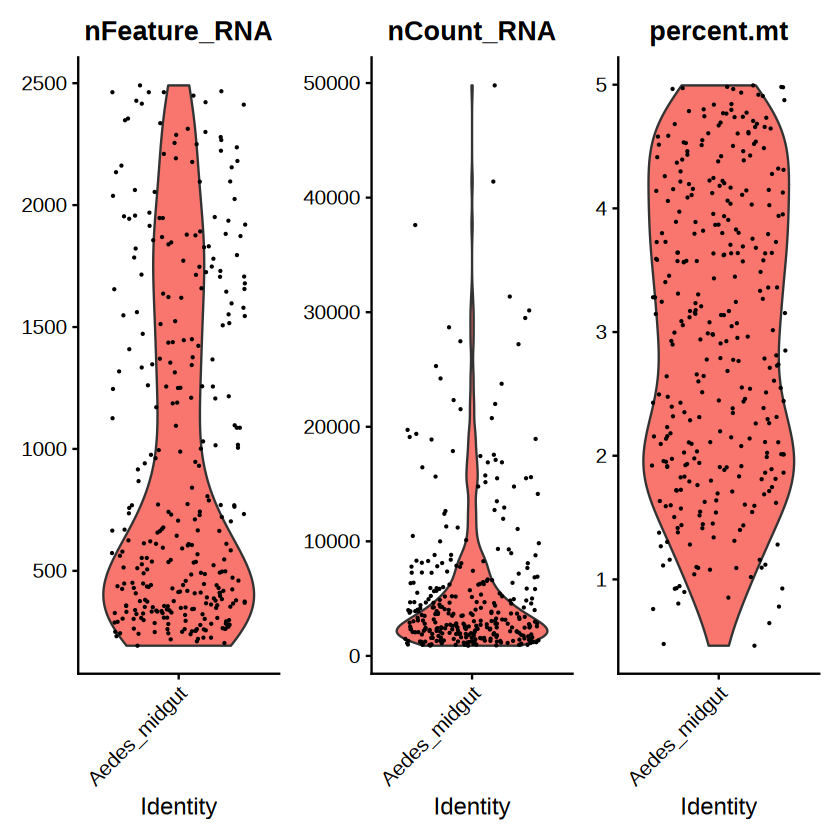

In [6]:
# set thresholds for maximum and minimum "nFeature_RNA", and maximum "percent.mt" and preprocessing data 

# args annotations
# path to seurat_obj RDS file
ipath_seurat_obj = './1.before_QC.seurat_obj.rds'
# minimum nFeature_RNA
min_nFeature_RNA = 100
# maximum nFeature_RNA
max_nFeature_RNA = 2500
# maximum percent.mt
max_percent.mt = 5
# path to save violin plot (pdf) of QC after filtering
opath_vlnplot = './2.QC.vlnplot.pdf'
# path to save scatter plot (pdf) of highly variable features
opath_dotplot_hvg = './2.QC.dotplot_hvg.pdf'
# path to save seurat_obj RDS file after QC and preprocessing
opath_seurat_obj = '2.QC.seurat_obj.rds'

# read in seurat_obj
# seurat_obj = readRDS(ipath_seurat_obj)

# filter out cells
seurat_obj <- subset(
    seurat_obj, 
    subset = nFeature_RNA > as.numeric(min_nFeature_RNA) & nFeature_RNA < as.numeric(max_nFeature_RNA) & percent.mt < as.numeric(max_percent.mt),
)

# Visualize QC metrics as a violin plot after filter
p = VlnPlot(seurat_obj, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
ggsave(opath_vlnplot, p)
p

In [7]:
# show genes and cells in seurat obj
seurat_obj

An object of class Seurat 
10601 features across 318 samples within 1 assay 
Active assay: RNA (10601 features, 0 variable features)

## cutoff 30%

Saving 6.67 x 6.67 in image


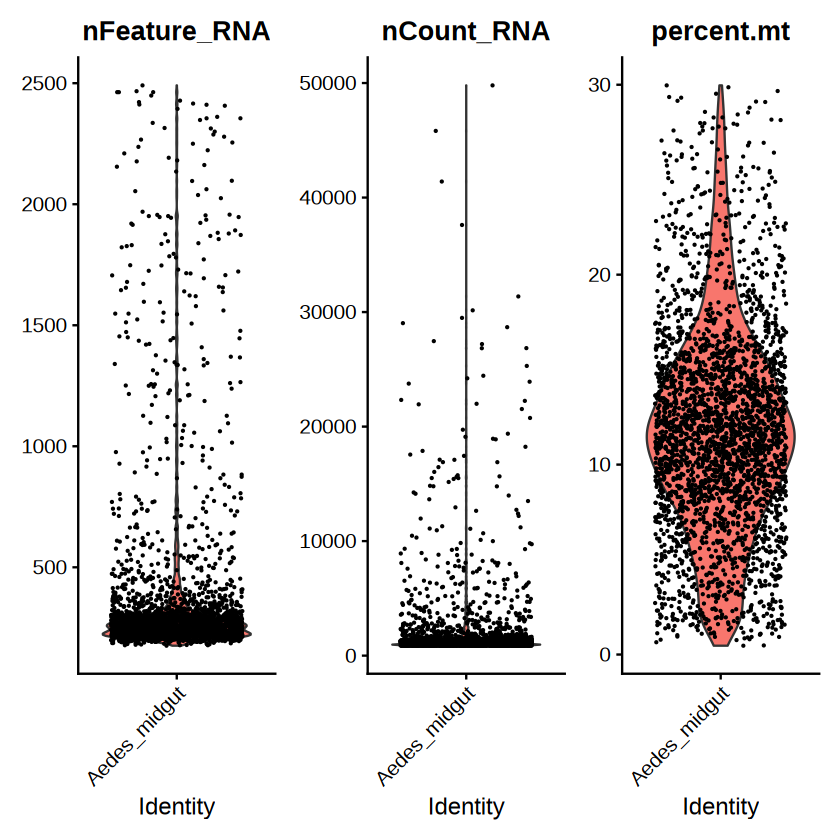

In [8]:
# set thresholds for maximum and minimum "nFeature_RNA", and maximum "percent.mt" and preprocessing data 

# args annotations
# path to seurat_obj RDS file
ipath_seurat_obj = './1.before_QC.seurat_obj.rds'
# minimum nFeature_RNA
min_nFeature_RNA = 100
# maximum nFeature_RNA
max_nFeature_RNA = 2500
# maximum percent.mt
max_percent.mt = 30
# path to save violin plot (pdf) of QC after filtering
opath_vlnplot = './2.QC.vlnplot.pdf'
# path to save scatter plot (pdf) of highly variable features
opath_dotplot_hvg = './2.QC.dotplot_hvg.pdf'
# path to save seurat_obj RDS file after QC and preprocessing
opath_seurat_obj = '2.QC.seurat_obj.rds'

# read in seurat_obj
seurat_obj = readRDS(ipath_seurat_obj)

# filter out cells
seurat_obj <- subset(
    seurat_obj, 
    subset = nFeature_RNA > as.numeric(min_nFeature_RNA) & nFeature_RNA < as.numeric(max_nFeature_RNA) & percent.mt < as.numeric(max_percent.mt),
)

# Visualize QC metrics as a violin plot after filter
p = VlnPlot(seurat_obj, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
ggsave(opath_vlnplot, p)
p

In [9]:
# show genes and cells in seurat obj
seurat_obj

An object of class Seurat 
10601 features across 2914 samples within 1 assay 
Active assay: RNA (10601 features, 0 variable features)

In [10]:
# remove MT genes
seurat_obj_data <- GetAssayData(seurat_obj, assay = "RNA")
seurat_obj_data <- seurat_obj_data[
    -(which(rownames(seurat_obj_data) %in% c(mt_genes, rib_genes))),]
seurat_obj <- subset(seurat_obj, features = rownames(seurat_obj_data))
seurat_obj

An object of class Seurat 
10562 features across 2914 samples within 1 assay 
Active assay: RNA (10562 features, 0 variable features)

When using repel, set xnudge and ynudge to 0 for optimal results

Saving 6.67 x 6.67 in image
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Centering and scaling data matrix



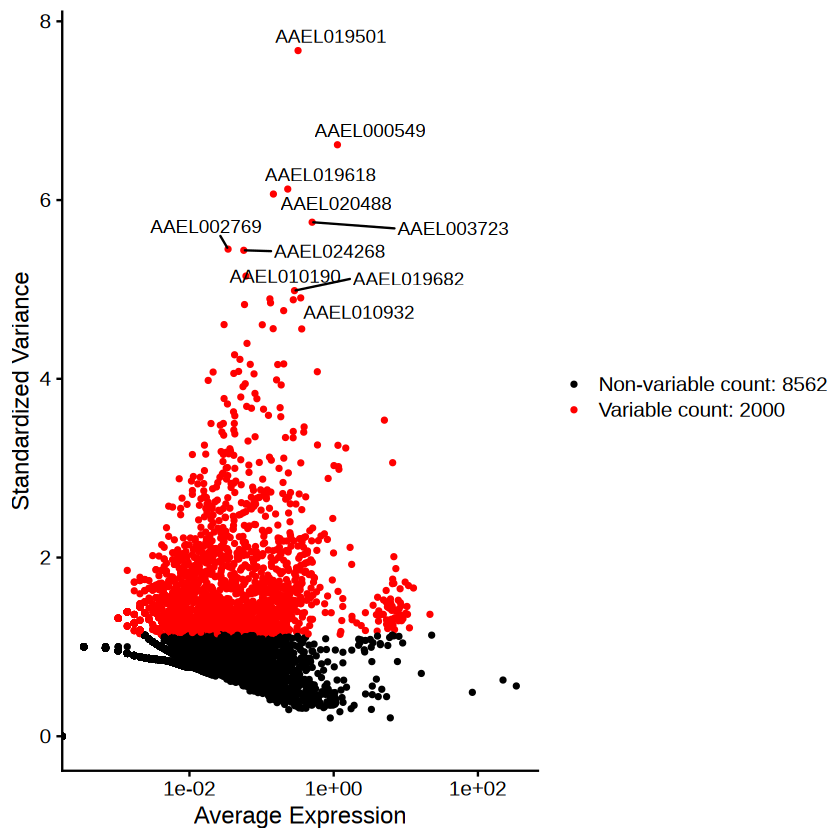

In [11]:
## preprocessing data 

# do normalization
seurat_obj <- NormalizeData(seurat_obj, normalization.method = "LogNormalize", scale.factor = 10000)

# feature selection
# Identification of highly variable features
seurat_obj <- FindVariableFeatures(seurat_obj, selection.method = "vst", nfeatures = 2000)
# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(seurat_obj), 10)
# plot variable features with and without labels
plot1 <- VariableFeaturePlot(seurat_obj)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
# save plot2
ggsave(opath_dotplot_hvg, plot2)
plot2

# scaling data
all.genes <- rownames(seurat_obj)
seurat_obj <- ScaleData(seurat_obj, features = all.genes)

# save seurat_obj after filtering
saveRDS(seurat_obj, file = opath_seurat_obj)

# dimensional reduction

PC_ 1 
Positive:  AAEL022140, AAEL003530, AAEL022286, AAEL014583, AAEL013885, AAEL010168, AAEL011471, AAEL020749, AAEL011656, AAEL007715 
	   AAEL008481, AAEL002832, AAEL021083, AAEL012686, AAEL005629, AAEL005817, AAEL011447, AAEL003427, AAEL013625, AAEL020290 
	   AAEL002047, AAEL005266, AAEL014562, AAEL002372, AAEL000987, AAEL008103, AAEL001759, AAEL024434, AAEL005097, AAEL023681 
Negative:  AAEL025097, AAEL019553, AAEL007682, AAEL019426, AAEL019997, AAEL001843, AAEL008078, AAEL009114, AAEL021805, AAEL011359 
	   AAEL025552, AAEL019596, AAEL009294, AAEL024269, AAEL019863, AAEL019626, AAEL004572, AAEL019431, AAEL017224, AAEL018039 
	   AAEL019542, AAEL012539, AAEL019424, AAEL019982, AAEL023512, AAEL020547, AAEL019474, AAEL018139, AAEL021222, AAEL025268 
PC_ 2 
Positive:  AAEL019618, AAEL022136, AAEL020488, AAEL010975, AAEL020452, AAEL019812, AAEL002565, AAEL026217, AAEL003117, AAEL003104 
	   AAEL019525, AAEL019514, AAEL010190, AAEL002417, AAEL019799, AAEL010205, AAEL019501, AAEL01085

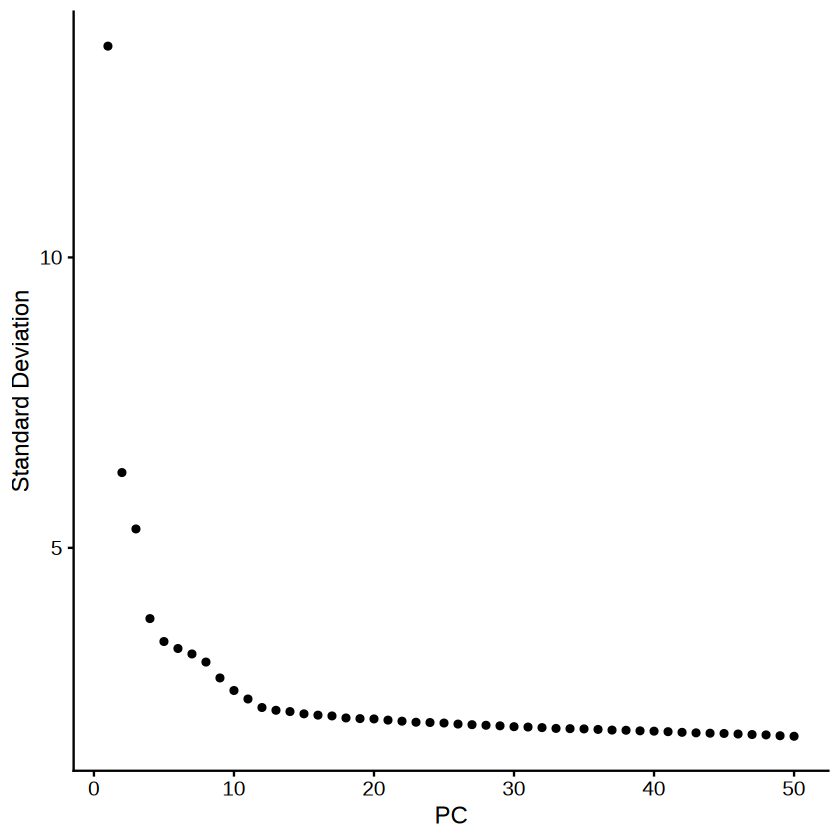

In [12]:
# dimensional reduction and cluster cells 

# args annotations
# path to seurat_obj RDS file
ipath_seurat_obj = './2.QC.seurat_obj.rds'
# number of PCs to plot
num_PCs = 60
# path to save DimHeatmap (pdf) of PCA
opath_dimheatmap = '3.PCA.DimHeatmap.1-20.pdf'
opath_dimheatmap = '3.PCA.DimHeatmap.21-40.pdf'
# path to save ElbowPlot (pdf) of PCA
opath_elbowPlot = '3.PCA.ElbowPlot.pdf'
# path to save seurat_obj
opath_seurat_obj = '3.PCA.seurat_obj.rds'

# read in seurat_obj
seurat_obj = readRDS(ipath_seurat_obj)
# PCA reduce dimension
seurat_obj <- RunPCA(seurat_obj, features = VariableFeatures(object = seurat_obj))
# plot DimHeatmap of PCA
# p1.1 = DimHeatmap(seurat_obj, dims = 1:30, balanced = TRUE)
# ggsave(opath_dimheatmap, p1.1)
# p1.1
# p1.2 = DimHeatmap(seurat_obj, dims = 31:num_PCs, balanced = TRUE)
# ggsave(opath_dimheatmap, p1.2)
# p1.2
# Plots the standard deviations of PCA
p2 = ElbowPlot(seurat_obj, ndims = num_PCs)
ggsave(opath_elbowPlot, p2)
p2
# save seurat_obj
saveRDS(seurat_obj, file = opath_seurat_obj)

# cluster

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2914
Number of edges: 134852

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6370
Number of communities: 8
Elapsed time: 0 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
11:32:32 UMAP embedding parameters a = 0.9922 b = 1.112

11:32:32 Read 2914 rows and found 30 numeric columns

11:32:32 Using Annoy for neighbor search, n_neighbors = 30

11:32:32 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

11:32:33 Writing NN index file to temp file /tmp/RtmpXNza7S/file1d8af1b73bfca

11:32:33 Searching Annoy index using 1 thread, search_k = 3000

11:32:34 Annoy recall = 100%

11:32:34 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors 

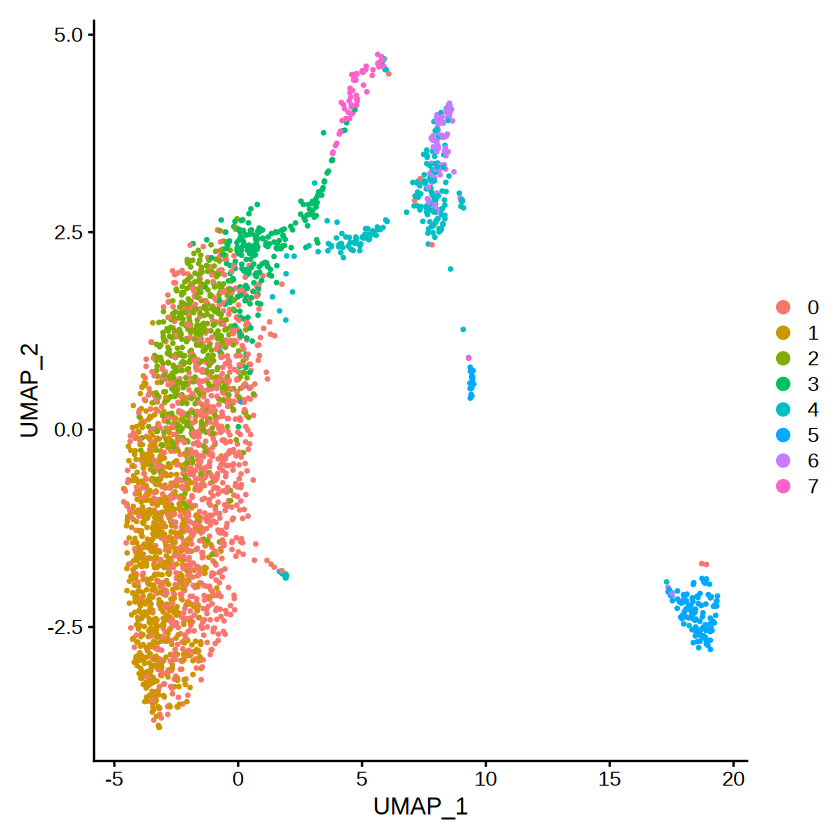

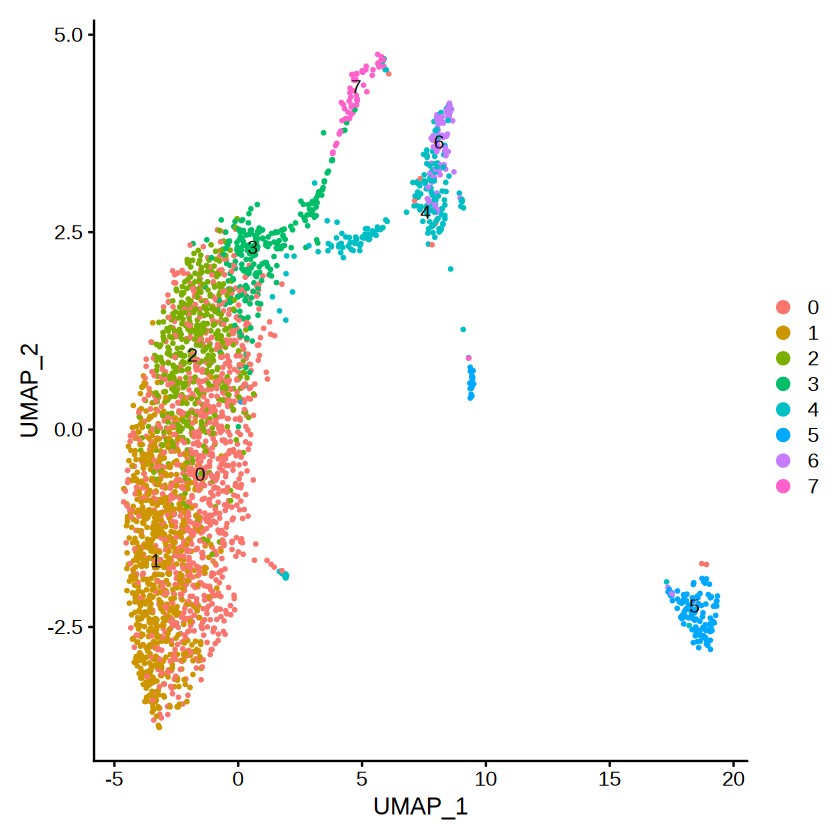

In [13]:
# dimensional reduction and cluster cells 

# args annotations
# path to seurat_obj RDS file
ipath_seurat_obj = './3.PCA.seurat_obj.rds'
# number of PCs to plot
num_PCs = 30
# resolution  between 0.4-1.2 typically returns good results 
#resolution = 0.5
# path to save DimHeatmap (pdf) of PCA
opath_DimPlot = '4.cluster.Dimplot.pdf'
# path to save DimHeatmap (pdf) of PCA
opath_DimPlot_labeled = '4.cluster.Dimplot.labeled.pdf'
# path to save seurat_obj
opath_seurat_obj = '4.cluster.seurat_obj.rds'

# read in seurat_obj
seurat_obj = readRDS(ipath_seurat_obj)
# construct a KNN graph based on PCA
seurat_obj <- FindNeighbors(seurat_obj, dims = 1:num_PCs)
# refine the edge weights between any two cells based on the shared overlap in their local neighborhoods (Jaccard similarity)
seurat_obj <- FindClusters(seurat_obj, resolution = 0.9)
# UMAP to cluster
seurat_obj <- RunUMAP(seurat_obj, dims = 1:num_PCs)
# plot
p = DimPlot(seurat_obj, reduction = "umap")
ggsave(opath_DimPlot, p)
p
# plot with label
p = DimPlot(seurat_obj, reduction = "umap", label = TRUE)
ggsave(opath_DimPlot_labeled, p)
p
# save seurat_obj
saveRDS(seurat_obj, file = opath_seurat_obj)

In [14]:
# args annotations
# path to seurat_obj RDS file
ipath_seurat_obj = './4.cluster.seurat_obj.rds'
# path to save seurat_obj
opath_seurat_obj = '5.marker.seurat_obj.rds'
# path to save marker genes
opath_marker_genes = '5.marker.genes.csv'

# read in seurat_obj
seurat_obj = readRDS(ipath_seurat_obj)
# find markers for every cluster compared to all remaining cells, report only the positive ones
seurat_obj.markers <- FindAllMarkers(seurat_obj, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
# save marker genes
write.csv(seurat_obj.markers, opath_marker_genes)
# save seurat_obj
saveRDS(seurat_obj, file = opath_seurat_obj)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7



# plot DoHeatmap

png 
  2

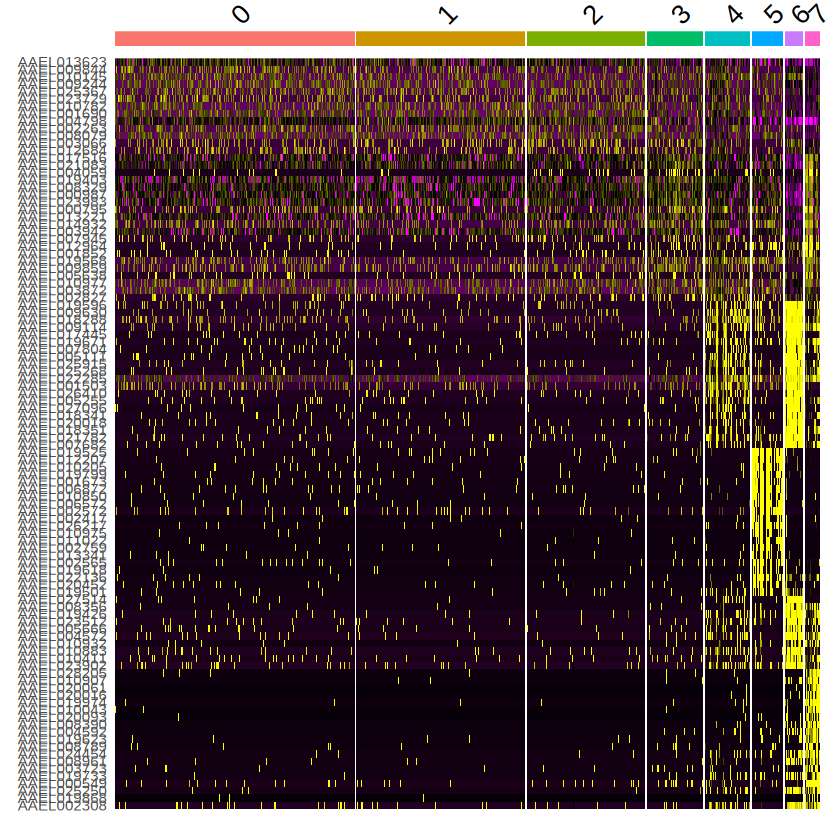

In [15]:
# path to read marker genes
ipath_marker_genes = '5.marker.genes.csv'
# path to read seurat_obj
ipath_seurat_obj = '5.marker.seurat_obj.rds'
# path to save DoHeatmap (pdf) of PCA
opath_DoPlot = '6.cluster.Doplot.pdf'

seurat_obj = readRDS(ipath_seurat_obj)
seurat_obj.markers = read.csv(ipath_marker_genes)

seurat_obj.markers %>%
    group_by(cluster) %>%
    top_n(n = 20, wt = avg_log2FC) -> topnG
p = DoHeatmap(seurat_obj, features = topnG$gene) + NoLegend()
cairo_pdf(opath_DoPlot, width=12, height=7)
plot(p)
dev.off()
p

# mark doublet

In [16]:
# https://cloud.tencent.com/developer/article/1825672
nExp <- round(ncol(seurat_obj) * 0.04)  # expect 4% doublets
data.filt <- doubletFinder_v3(
    seurat_obj, 
    pN = 0.25, # https://cloud.tencent.com/developer/article/1825672
    pK = 0.09, 
    nExp = nExp, 
    PCs = 1:30)

Loading required package: fields

Loading required package: spam



Spam version 2.9-1 (2022-08-07) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.


Attaching package: ‘spam’


The following object is masked from ‘package:Matrix’:

    det


The following objects are masked from ‘package:base’:

    backsolve, forwardsolve


Loading required package: viridisLite


Try help(fields) to get started.

Loading required package: KernSmooth

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009



[1] "Creating 971 artificial doublets..."
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Computing pANN..."
[1] "Classifying doublets.."


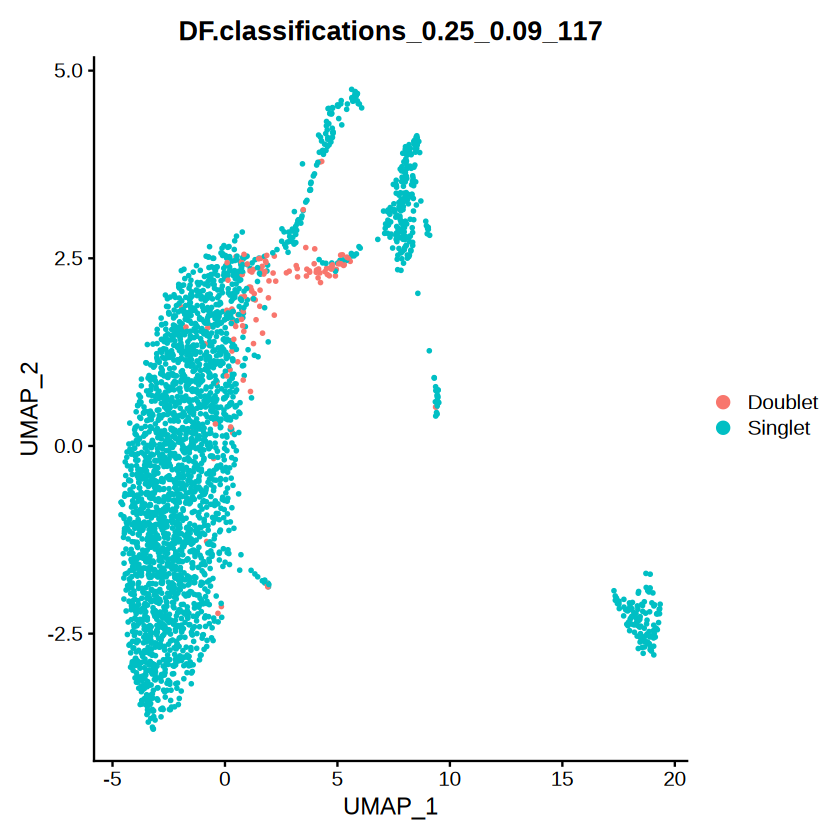

In [17]:
DF.name = colnames(data.filt@meta.data)[grepl("DF.classification", colnames(data.filt@meta.data))]

DimPlot(data.filt, group.by = DF.name)

In [18]:
# save seurat_obj
opath_seurat_obj = '7.mark_doublet.seurat_obj.rds'
saveRDS(data.filt, file = opath_seurat_obj)

# output

In [19]:
# path to read seurat_obj
ipath_seurat_obj = '7.mark_doublet.seurat_obj.rds'
seurat_obj = readRDS(ipath_seurat_obj)

In [20]:
# write out meta.data
opath_meta_data = '8.meta_data.csv'
write.csv(seurat_obj@meta.data, opath_meta_data)

In [21]:
# write out umap pos
opath_umap_pos = '8.umap_pos.csv'
write.csv(seurat_obj[["umap"]]@cell.embeddings, opath_umap_pos)

In [22]:
# write out reads count as a mtx
opath_rdc_mtx = '8.rd_count.mtx'
writeMM(Matrix(seurat_obj@assays$RNA@counts, sparse = T), opath_rdc_mtx)

NULL